[Plots.jl] Switched to backend: pyplot
axes = [PyObject <matplotlib.axes.AxesSubplot object at 0x8238750> PyObject <matplotlib.axes.AxesSubplot object at 0x8259c50>
 PyObject <matplotlib.axes.AxesSubplot object at 0x8243b10> PyObject <matplotlib.axes.AxesSubplot object at 0x8347910>]

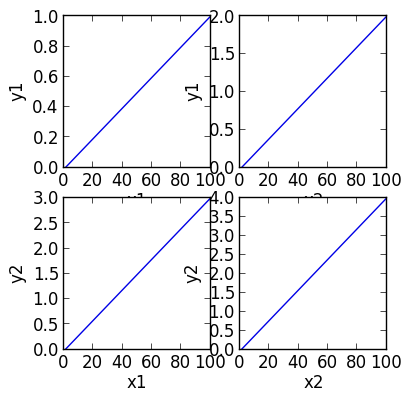


fig = PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x8238190>)
axes = [PyObject <matplotlib.axes.AxesSubplot object at 0x8238750>,PyObject <matplotlib.axes.AxesSubplot object at 0x8259c50>,PyObject <matplotlib.axes.AxesSubplot object at 0x8243b10>,PyObject <matplotlib.axes.AxesSubplot object at 0x8347910>]


In [5]:
using Plots
pyplot()
default(leg=false,size=(400,400));
y = collect(linspace(0,1,100))
p = subplot(Any[y*i for i in 1:4],n=4, ylabel=["y1","y1","y2","y2"], xlabel=["x1","x2","x1","x2"])


fig = PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x74d7410>)
axes = [PyObject <matplotlib.axes.AxesSubplot object at 0x74d7a10>,PyObject <matplotlib.axes.AxesSubplot object at 0x785dbd0>,PyObject <matplotlib.axes.AxesSubplot object at 0x7880d90>,PyObject <matplotlib.axes.AxesSubplot object at 0x7aca110>]


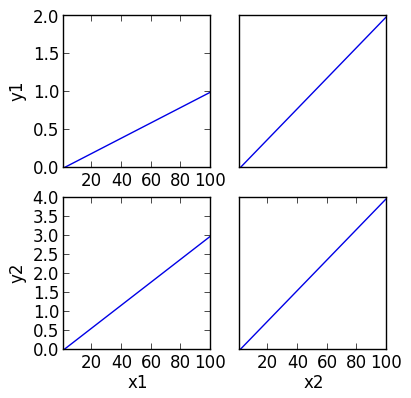

In [4]:
subplot!(link=true)
#xlims!(p.plts[1], (-5,50))
#ylims!(p.plts[1], -0.5,1)

In [ ]:
gplt = p.plts[1].o
plot!(p.plts[1], rand(100,5)*3)

In [22]:
lims = [Inf,-Inf]
for l in gplt.layers
    Plots.expandLimits!(lims, l.mapping[:y])
end
lims

2-element Array{Float64,1}:
 0.0    
 2.99946

In [ ]:
p = subplot(repmat(y,1,4),layout=[1,1,2])

In [ ]:
using Plots, StatsBase; pyplot()
default(size=(600,600),leg=false)
p = subplot(Any[rand(sample(10:200))*sample(1:10) for i in 1:6], n=6, link=true)
subplot!(xlabel=["x1","x2","x3"], ylabel=["y1","","","y2"])

INFO: Recompiling stale cache file /home/tom/.julia/lib/v0.4/Plots.ji for module Plots.


[Plots.jl] Default backend: immerse
[Plots.jl] Switched to backend: qwt
[Plots.jl] Initializing backend: qwt

("before",isx,series,lims) = ("before",true,Series{axis=left label=y1 idx=1 npoints=0},[Inf,-Inf])

ERROR: ArgumentError: collection must be non-empty


ERROR: ArgumentError: collection must be non-empty
ERROR: ArgumentError: collection must be non-empty
ERROR: ArgumentError: collection must be non-empty
ERROR: ArgumentError: collection must be non-empty
ERROR: ArgumentError: collection must be non-empty
ERROR: ArgumentError: collection must be non-empty
ERROR: ArgumentError: collection must be non-empty
ERROR: ArgumentError: collection must be non-empty
ERROR: ArgumentError: collection must be non-empty
ERROR: ArgumentError: collection must be non-empty
ERROR: ArgumentError: collection must be non-empty
ERROR: ArgumentError: collection must be non-empty
ERROR: ArgumentError: collection must be non-empty
ERROR: ArgumentError: collection must be non-empty
ERROR: ArgumentError: collection must be non-empty
ERROR: ArgumentError: collection must be non-empty
ERROR: ArgumentError: collection must be non-empty
ERROR: ArgumentError: collection must be non-empty
ERROR: ArgumentError: collection must be non-empty
ERROR: ArgumentError: collectio

("after",isx,series,lims) = ("after",true,Series{axis=left label=y1 idx=1 npoints=0},[Inf,-Inf])
("before",isx,series,lims) = ("before",true,Series{axis=left label=y2 idx=1 npoints=0},[Inf,-Inf])
("after",isx,series,lims) = ("after",true,Series{axis=left label=y2 idx=1 npoints=0},[Inf,-Inf])
("before",isx,series,lims) = ("before",true,Series{axis=left label=y2 idx=2 npoints=1000},[Inf,-Inf])
("after",isx,series,lims) = ("after",true,Series{axis=left label=y2 idx=2 npoints=1000},[-6.349553761472921,7.04344825216217])
("before",isx,series,lims) = ("before",true,Series{axis=left label=y3 idx=1 npoints=0},[Inf,-Inf])
("after",isx,series,lims) = ("after",true,Series{axis=left label=y3 idx=1 npoints=0},[Inf,-Inf])
("before",isx,series,lims) = ("before",true,Series{axis=left label=y2 idx=2 npoints=1000},[Inf,-Inf])
("after",isx,series,lims) = ("after",true,Series{axis=left label=y2 idx=2 npoints=1000},[99.03050321453688,100.75251250777524])
("before",isx,series,lims) = ("before",true,Series{a

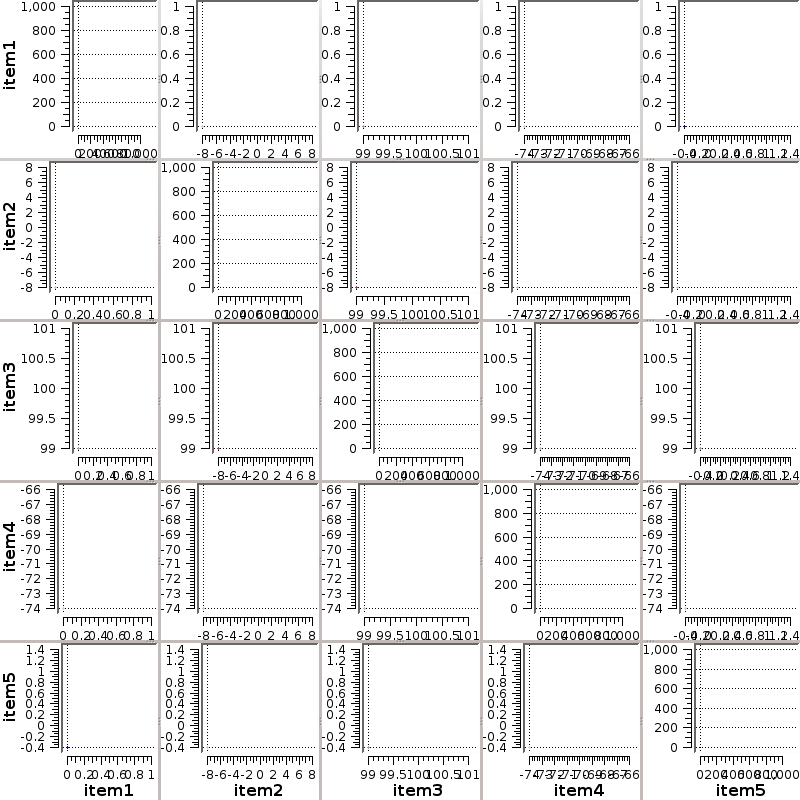

In [1]:
using Plots, OnlineStats
qwt()
default(size=(800,800),leg=false)

n = 1000
x = rand(n)
y = 2randn(n) + 0.4x
z = 0.2randn(n) - 0.3x - 0.1y + 100
u = randn(n) - 0.5z - 20
v = 0.1randn(n) + x

M = [x y z u v]
# M = repmat(M, 1, 2)
C = cor(CovarianceMatrix(M))

# debugplots()
p = corrplot(M, C, labels=["item$i" for i in 1:size(M,2)]) #, size=(600,600), colors=[colorant"orange", colorant"black", colorant"green"])

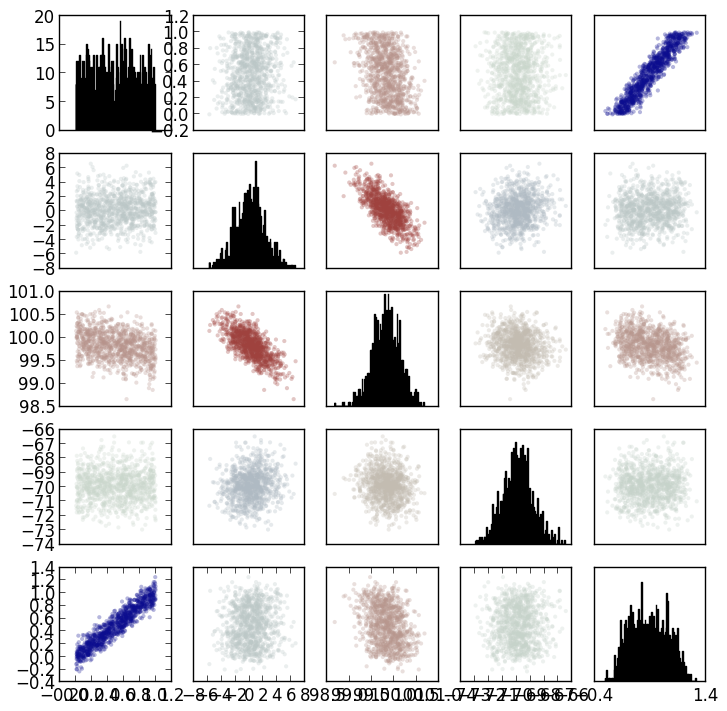

In [2]:
ax = p.plts[end].o.ax
lim1, lim2 = ax[:get_xlim]()
xticks!(p.plts[end], [lim1,lim2])

In [ ]:
for (r,c) in gl
    @show r,c
end
length(gl)

In [14]:
plot!(p.plts[1], xlim=(-5,5))
gui()